In [1]:
import numpy as np
from scipy.io import arff
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

np.set_printoptions(linewidth=120)

In [36]:
def plot_eigen_values(eig_values):
    fig, ax = plt.subplots()
    fig.suptitle("Eigen values Plot")
    xvar = np.arange(1, eig_values.shape[0] + 1)

    ax.bar(xvar, eig_values, label="Eigen values")
    ax.set_xlabel("Number of components")
    ax.set_ylabel("Eigen value")

    ax2 = plt.twinx()
    ax2.plot(xvar, np.cumsum(eig_values / np.sum(eig_values)), color='red',
             label='Accum. Variability')
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("% of variance explained")

    print "Explained variance ratio (comp, %) => {}".format(
        zip(xvar, (eig_values / np.sum(eig_values))))

    #fig.legend()
    #fig.show()

In [17]:
def plot_components(proj, evec, idx=[0, 1], var_labels=None, scale=True):
    assert len(idx) == 2, "Please select only 2 dimensions/components"

    proj_labels = ["PC{}".format(i+1) for i in idx]
    if not var_labels:
        var_labels = ["VAR{}".format(j + 1) for j in range(evec.shape[0])]

    if scale:
        proj = proj[:, idx]/np.ptp(proj[:, idx], axis=0)

    plt.figure()
    plt.title("PCA Biplot: individuals and variables")
    plt.grid(linestyle='--', linewidth=0.5)
    plt.axhline(0, color='darkgray')
    plt.axvline(0, color='darkgray')

    plt.scatter(proj[:, idx[0]], proj[:, idx[1]], s=2)
    plt.xlabel(proj_labels[0])
    plt.ylabel(proj_labels[1])
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)

    for j, label in enumerate(var_labels):
        plt.arrow(0, 0, evec[j, idx[0]], evec[j, idx[1]], color='r', alpha=0.5)
        plt.text(evec[j, idx[0]] * 1.1, evec[j, idx[1]] * 1.1, label,
                 color='r', ha='center', va='center')

    plt.show()

In [18]:
def descriptive_stats(X):
    # Descriptive statistics
    sep = "\t"
    print sep.join(["var", "Min.", "1st Qu.", "Median", "Mean", "Std.Dev", "3rd Qu.",
                    "Max."])
    for i in range(X.shape[1]):
        stats = [
            np.min(X[:, i]),
            np.percentile(X[:, i], 0.25),
            np.percentile(X[:, i], 0.5),
            np.mean(X[:, i]),
            np.std(X[:, i]),
            np.percentile(X[:, i], 0.75),
            np.max(X[:, i])
        ]
        print sep.join([var_labels[i]] + ["%.2f" %s for s in stats])


In [25]:
def plot_vars(var_labels, var_data, var_1, var_2):
    # Plot 2 original vars
    idx = [var_1, var_2]
    plt.figure()
    plt.title("Scatter plot: {} vs {}".format(var_labels[idx[1]], var_labels[idx[0]]))
    plt.grid(linestyle='--', linewidth=0.5)
    plt.scatter(var_data[:, idx[0]], var_data[:, idx[1]], s=2)
    plt.xlabel(var_labels[idx[0]])
    plt.ylabel(var_labels[idx[1]])
    plt.show()

In [26]:
def plot_correlation(X):
    # Correlation Visualization
    plt.matshow(np.corrcoef(X.transpose())-np.identity(X.shape[1]),
                cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.colorbar()
    plt.show()

In [49]:
def iml_pca(x_data,x_labels):

    #calculate the mean of each feature
    means_array = np.mean(x_data, axis=0)
    vars_array = np.var(x_data, axis=0)
    print means_array
    print vars_array
    #Substract the mean of the feature to each feature value
    pca_data=x_data-means_array

    #print ("Correlation matrix")
    plot_correlation(pca_data)
    #Calculate covariance matrix
    covars_matrix = np.cov(pca_data,rowvar=0)
    #print ("Covar matrix")
    #print covars_matrix
    
    
    #Calculate the eigenvectors and eigenvalues
    w, v = LA.eig(covars_matrix)
    #print "Eigenvalues:"
    #print w
    #print "Eigenvectors:"
    #print v

    #Sort the eigenvectors and eigenvalues
    idx = w.argsort()[::-1]
    eigenValues = w[idx]
    eigenVectors = v[:,idx]

    #print "Descending Eigenvalues:"
    #print eigenValues
    #print "Descending Eigenvectors:"
    #print eigenVectors
    
    plot_eigen_values(eigenValues)
    #How to chose k?

    for k in range(1,len(eigenVectors)):
        if (np.sum(eigenValues[0:k])/np.sum(eigenValues)) > 0.9:
            break

    print ("K value is")
    print k

    kEigenVectors=eigenVectors[:,0:k]
    kEigenValues=eigenValues[0:k]

    #print ("Eigen vectors (k)")
    #print kEigenVectors
    #print ("Eigen values (k)")
    #print kEigenValues

    #derive new data set
    newDataSet=np.dot(kEigenVectors.transpose(),pca_data.transpose())

    newDataSet=newDataSet.transpose()
    
    print ("New Data")
    print newDataSet.shape
    
    plot_vars(["PC1","PC2"], newDataSet, 0, 1)
    plot_vars(["PC1","PC2","PC3"], newDataSet, 1, 2)

    vars_pcs = np.var(newDataSet.transpose(), axis=0)
    
    
    #reconstruction
    dataRecover=np.dot(kEigenVectors,newDataSet.transpose())

    print ("Data reconstructed")


    plot_vars(data_labels, dataRecover.transpose(), 1, 2)
    plot_vars(data_labels, dataRecover.transpose(), 1, 5)

#### Dataset Wisconsin Breast Cancer

Dataset: wisconsin-breast-cancer
	Clump_Thickness's type is numeric
	Cell_Size_Uniformity's type is numeric
	Cell_Shape_Uniformity's type is numeric
	Marginal_Adhesion's type is numeric
	Single_Epi_Cell_Size's type is numeric
	Bare_Nuclei's type is numeric
	Bland_Chromatin's type is numeric
	Normal_Nucleoli's type is numeric
	Mitoses's type is numeric
	Class's type is nominal, range is ('benign', 'malignant')



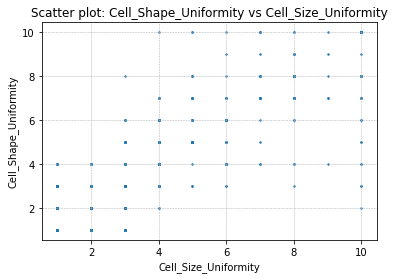

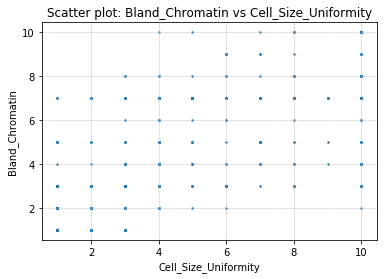

[ 4.41773963  3.13447783  3.2074392   2.80686695  3.21602289  3.43776824  2.86695279  1.58941345]
[ 7.91705297  9.29808167  8.81962992  8.14152652  4.8961095   5.93711433  9.31133993  2.93728421]


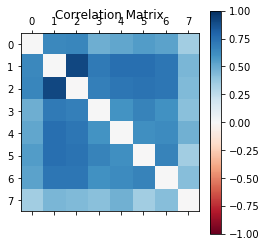

Explained variance ratio (comp, %) => [(1, 0.69863186925146625), (2, 0.074961001903178406), (3, 0.060057977680096429), (4, 0.048827329141416957), (5, 0.044330030845596162), (6, 0.031122882459840354), (7, 0.027812838529130305), (8, 0.014256070189275202)]
K value is
5
New Data
(699, 5)


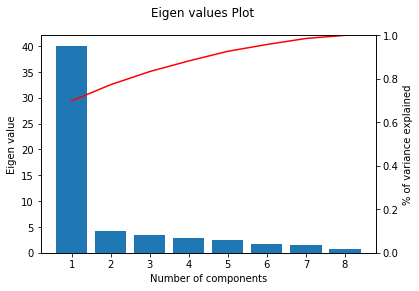

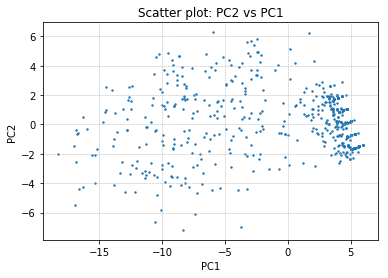

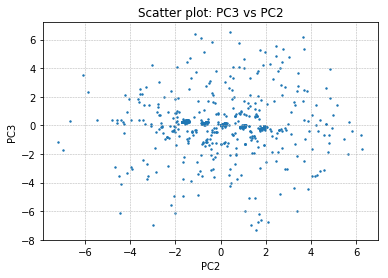

Data reconstructed


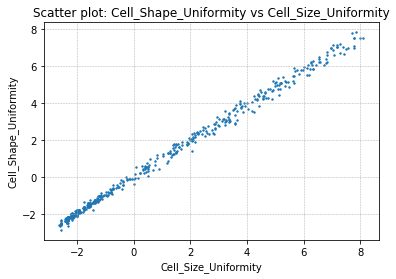

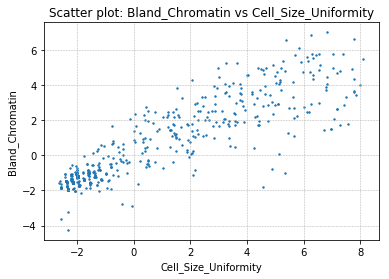

In [57]:
f = "datasets/breast-w.arff"
data, meta = arff.loadarff(f)

print meta

#print data['Bare_Nuclei'] --> han nan value, we ignore it for the purpose of the exercice
data_num = np.zeros((len(data), 8))
data_labels = ["Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Single_Epi_Cell_Size","Bland_Chromatin","Normal_Nucleoli","Mitoses"]


#print data_num.shape

i = 0
for d in data:
    data_num[i, :] = [d[0], d[1], d[2], d[3],d[4], d[6], d[7],d[8]]
    i += 1

#print ("Data")
#print data_num[1:30,:]
#len(data_labels)

            
plot_vars(data_labels, data_num, 1, 2)
plot_vars(data_labels, data_num, 1, 5)


iml_pca(data_num,data_labels)


[[ 7.92715688  5.55305515  5.47483304  3.90917196  3.23827552  3.83364283  4.60706569  1.69845607]
 [ 5.55305515  9.60915992  7.90841144  6.12513925  5.07357919  5.65091125  6.73566629  2.40030985]
 [ 5.47483304  7.90841144  9.031335    5.77933044  4.85380405  5.44997939  6.50418357  2.25764666]
 [ 3.90917196  6.12513925  5.77933044  8.13232026  3.80340611  4.71264759  5.24707291  2.08142517]
 [ 3.23827552  5.07357919  4.85380405  3.80340611  4.76434604  3.26764522  4.25924717  1.86834761]
 [ 3.83364283  5.65091125  5.44997939  4.71264759  3.26764522  5.71066065  5.00223724  1.33297341]
 [ 4.60706569  6.73566629  6.50418357  5.24707291  4.25924717  5.00223724  9.3163372   2.26539541]
 [ 1.69845607  2.40030985  2.25764666  2.08142517  1.86834761  1.33297341  2.26539541  2.84885482]]


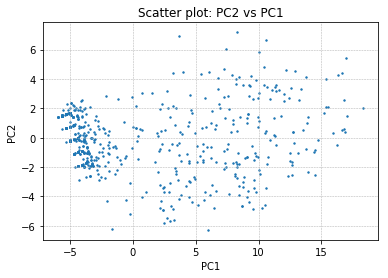

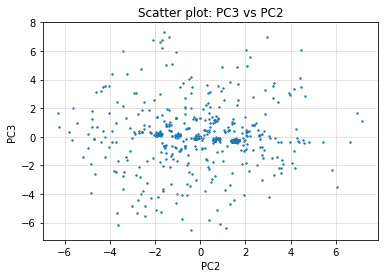

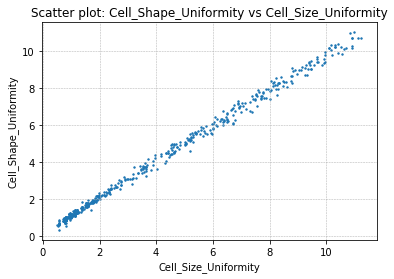

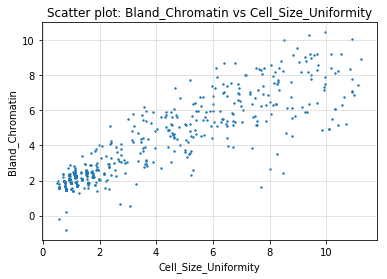

In [59]:
pca = PCA(n_components=5)
newPCAData=pca.fit_transform(data_num)
covar=pca.get_covariance()
print covar
recoverdata=pca.inverse_transform(newPCAData)
plot_vars(["PC1","PC2"], newPCAData, 0, 1)
plot_vars(["PC1","PC2","PC3"], newPCAData, 1, 2)
plot_vars(data_labels, recoverdata, 1, 2)
plot_vars(data_labels, recoverdata, 1, 5)

Dataset: bupa
	MCV's type is numeric
	alkphos's type is numeric
	sgpt's type is numeric
	sgot's type is numeric
	gammagt's type is numeric
	drinks's type is numeric
	selector's type is nominal, range is ('1', '2')

[[  85.    64.    59.    32.    23.     0. ]
 [  86.    54.    33.    16.    54.     0. ]
 [  91.    78.    34.    24.    36.     0. ]
 [  87.    70.    12.    28.    10.     0. ]
 [  98.    55.    13.    17.    17.     0. ]
 [  88.    62.    20.    17.     9.     0.5]
 [  88.    67.    21.    11.    11.     0.5]
 [  92.    54.    22.    20.     7.     0.5]
 [  90.    60.    25.    19.     5.     0.5]
 [  89.    52.    13.    24.    15.     0.5]
 [  82.    62.    17.    17.    15.     0.5]
 [  90.    64.    61.    32.    13.     0.5]
 [  86.    77.    25.    19.    18.     0.5]
 [  96.    67.    29.    20.    11.     0.5]
 [  91.    78.    20.    31.    18.     0.5]
 [  89.    67.    23.    16.    10.     0.5]
 [  89.    79.    17.    17.    16.     0.5]
 [  91.   107.    20

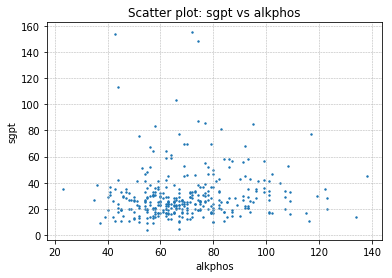

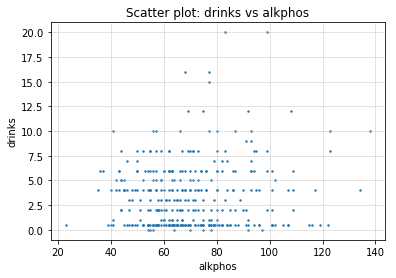

[ 90.15942029  69.86956522  30.4057971   24.64347826  38.28405797   3.45507246]
[   19.72820836   335.66124764   379.62663306   101.00042848  1536.4584415     11.10885108]


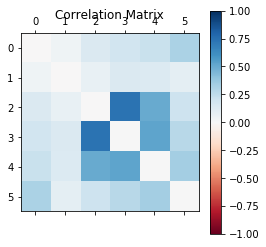

Explained variance ratio (comp, %) => [(1, 0.71291587910069276), (2, 0.13783074053686159), (3, 0.1216982259526339), (4, 0.015797412425789213), (5, 0.0081962479575506883), (6, 0.0035614940264718465)]
K value is
3
New Data
(345, 3)


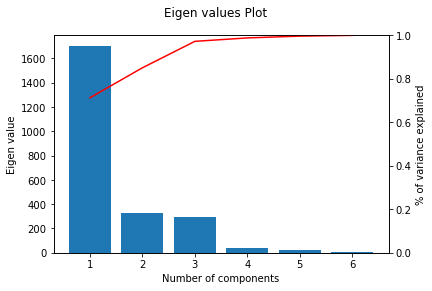

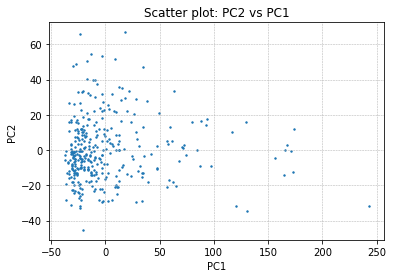

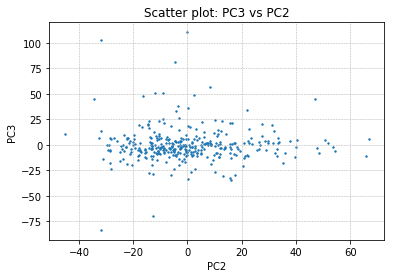

Data reconstructed


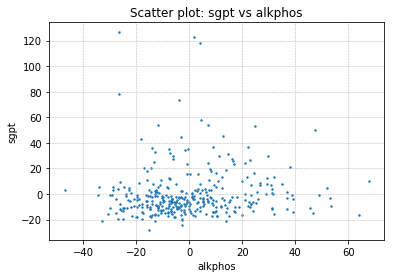

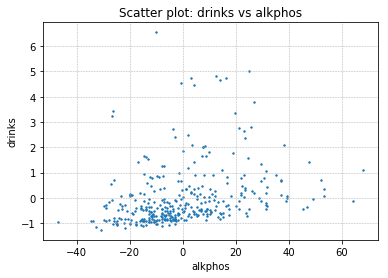

In [54]:
f = "datasets/bupa.arff"
data, meta = arff.loadarff(f)

print meta

#print data['Bare_Nuclei'] --> han nan value, we ignore it for the purpose of the exercice
data_num = np.zeros((len(data), 6))
data_labels = ["MCV","alkphos","sgpt","sgot","gammagt","drinks"]



i = 0
for d in data:
    data_num[i, :] = [d[0], d[1], d[2], d[3],d[4], d[5]]
    i += 1

#print ("Data")
#print data_num[1:30,:]
#len(data_labels)
print data_num[1:80,:]
            
plot_vars(data_labels, data_num, 1, 2)
plot_vars(data_labels, data_num, 1, 5)


iml_pca(data_num,data_labels)



[[  2.30070888e+01   3.69557974e+00   1.34349332e+01   6.74572130e+00   3.89027382e+01   1.19311082e+00]
 [  3.69557974e+00   3.36610518e+02   2.70528405e+01   2.75809890e+01   9.58661875e+01   6.14448521e+00]
 [  1.34349332e+01   2.70528405e+01   3.78806610e+02   1.50344254e+02   3.85372043e+02   1.41539601e+01]
 [  6.74572130e+00   2.75809890e+01   1.50344254e+02   8.78558927e+01   2.09076731e+02   7.34592130e+00]
 [  3.89027382e+01   9.58661875e+01   3.85372043e+02   2.09076731e+02   1.54090237e+03   4.45502553e+01]
 [  1.19311082e+00   6.14448521e+00   1.41539601e+01   7.34592130e+00   4.45502553e+01   2.33303555e+01]]


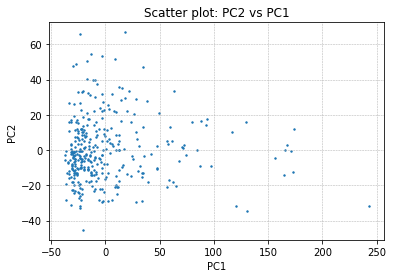

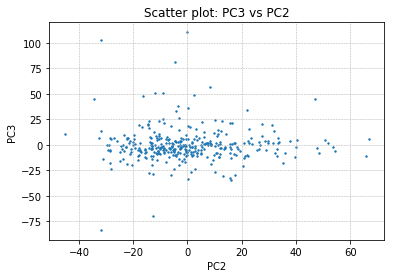

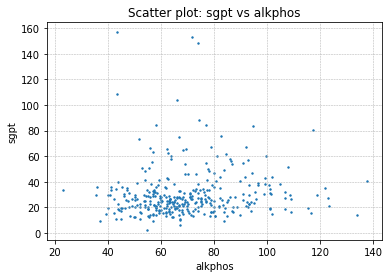

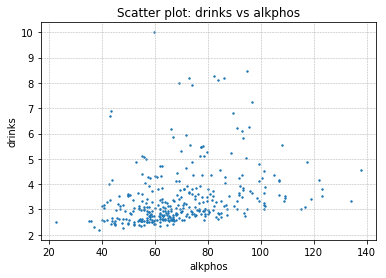

In [55]:
pca = PCA(n_components=3)
newPCAData=pca.fit_transform(data_num)
covar=pca.get_covariance()
print covar
recoverdata=pca.inverse_transform(newPCAData)
plot_vars(["PC1","PC2"], newPCAData, 0, 1)
plot_vars(["PC1","PC2","PC3"], newPCAData, 1, 2)
plot_vars(data_labels, recoverdata, 1, 2)
plot_vars(data_labels, recoverdata, 1, 5)
